# Week 2 lab section
---
## Goal 
In lab 02, you will practice:
    1. How to load the dataset from npz file.
    2. How to manipulate dataset using numpy, pandas, e.t.c
    3. How to visualize your data.
    
## Important concept
### Monte Carlo simulation
Monte Carlo simulation is an essential component of experimental particle physics in all the phases of its life-cycle: the investigation of the physics reach of detector concepts, the design of facilities and detectors, the development and optimization of data reconstruction software, the data analysis for the production of physics results. This note briefly outlines some research topics related to Monte Carlo simulation, that are relevant to future experimental perspectives in particle physics. The focus is on physics aspects: conceptual progress beyond current particle transport schemes, the incorporation of materials science knowledge relevant to novel detection technologies, functionality to model radiation damage, the capability for multi-scale simulation, quantitative validation, and uncertainty quantification to determine the predictive power of simulation. The R&D; on simulation for future detectors would profit from cooperation within various components of the particle physics community, and synergy with other experimental domain sharing similar simulation requirements.

Reference: https://cds.cern.ch/record/1471335
### Event selection
Event selection is a method to filter out the event that is not demanded.
The concept of selection base on the physics process you set.
For example, for a fully hadronic process p p > t $\bar{t}$ event, there should exist 6 jets which transverse momentum larger than 25 GeV and |$\eta$| smaller than 2.5 due to top quark will decay to b quark and W boson, then W boson will contribute 2 jets and b quark will contribute 1 jet.
### Jet reconstruction and Jet image
#### Jet reconstruction 
A jet can be defined as a collimated spray of stable particles arising from the fragmentation
and hadronization of a parton(quark or gluon) after a collision. Jet reconstruction algorithms
are used to combine the calorimetry and tracking information to define jets. The jets provide a
link between the observed colourless stable particles and the underlying physics at the partonic
level. 

Reference: https://iopscience.iop.org/article/10.1088/1742-6596/645/1/012008/pdf
#### Jet image
Jet image is a modern technology that convert the data in detector into image-base data.
The method is inspired by the preprocessing of data in image-base machine learning.


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Data visualization tool

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phys591000-week02/train.npz
/kaggle/input/phys591000-week02/train.h5
/kaggle/input/phys591000-week02/X_Val.csv
/kaggle/input/phys591000-week02/npz/val.npz
/kaggle/input/phys591000-week02/npz/train.npz
/kaggle/input/phys591000-week02/npz/test.npz
/kaggle/input/phys591000-week02/hdf5/test.h5
/kaggle/input/phys591000-week02/hdf5/train.h5
/kaggle/input/phys591000-week02/hdf5/val.h5


### Practice 1
---
1.1  
Load the npz file `/kaggele/input/phys5910000-week02/npz/train.npz` and store the `jet_pt`, `jet_eta`, `jet_phi` and `jet_mass` array in the dataset to variables.  

1.2  
Filter out the jet with transverse momentum smaller than 600 GeV and |$\eta$| larger than 1.  
Store the filter result to a new array.

1.3  
Base on the previous selection, store the survived jet's data to npz file and hdf5 file.  
(Please show that your output file is exist.)

In [2]:
##############################################################################
#Code for 1.1
file = np.load('/kaggle/input/phys591000-week02/npz/train.npz', allow_pickle=True)

jet_pt = file['jet_pt']
jet_eta = file['jet_eta']
jet_phi = file['jet_phi']
jet_mass = file['jet_mass']

##############################################################################

In [3]:
##############################################################################
#Code for 1.2

table = {'jet_pt': file['jet_pt'],
        'jet_eta': file['jet_eta'],
        'jet_phi': file['jet_phi'],
        'jet_mass': file['jet_mass'],
        }

df = pd.DataFrame(table)

cond1 = df['jet_pt'] >= 600
cond2 = df['jet_eta'].abs() <= 1

cond = cond1 & cond2
df_filter = pd.DataFrame(df[cond])

array = np.array(df_filter)
##############################################################################

In [4]:
##############################################################################
#Code for 1.3
np.savez('filtered_event_npz', filter_jet_pt = df_filter['jet_pt'], 
         filter_jet_eta = df_filter['jet_eta'], 
         filter_jet_phi = df_filter['jet_phi'], 
         filter_jet_mass = df_filter['jet_mass'], 
        )

df.to_hdf('filtered_event_h5.hdf5', key='df', mode='w')

if os.path.exists("./filtered_event_npz.npz"):
    print("npz file exists")
if os.path.exists("./filtered_event_h5.hdf5"):
    print("h5 file exists")
##############################################################################

npz file exists
h5 file exists


### Practice 2 
---
2.1  
Load the data you save in practice 1.3.  
Plot the histogram of leading jet's `pt`, `eta`, `phi`, and `mass`.  

Hint: Leading jet is the first jet in each event.  

2.2  
Construct a data frame using jet's `pt`, `eta`, `phi`, and `mass`.  
Compute jet's `px`, `py`, `pz`, and `energy` using the information you have.  


Text(0.5, 1.0, 'histogram of jet_mass')

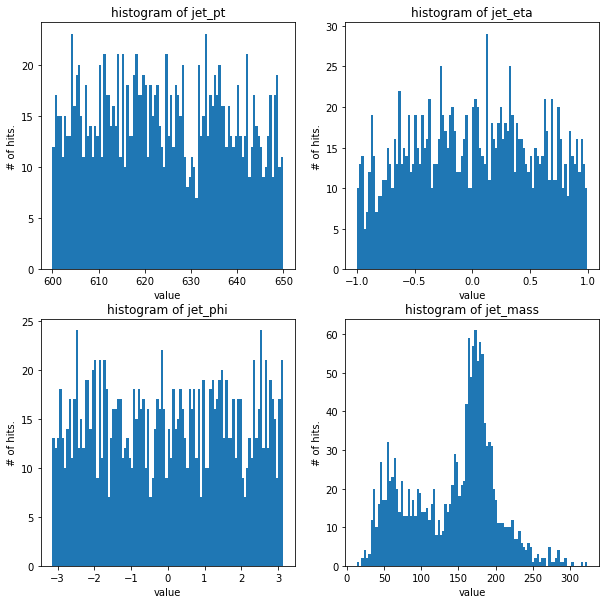

In [5]:
##############################################################################
#Code for 2.1
file = np.load('./filtered_event_npz.npz', allow_pickle = True)


plt.figure(figsize = (10,10))

plt.subplot(2,2,1)
plt.xlabel('value')
plt.ylabel('# of hits.')
plt.hist(file['filter_jet_pt'],bins =100)
plt.title('histogram of jet_pt')

plt.subplot(2,2,2)
plt.xlabel('value')
plt.ylabel('# of hits.')
plt.hist(file['filter_jet_eta'],bins =100)
plt.title('histogram of jet_eta')

plt.subplot(2,2,3)
plt.xlabel('value')
plt.ylabel('# of hits.')
plt.hist(file['filter_jet_phi'],bins =100)
plt.title('histogram of jet_phi')

plt.subplot(2,2,4)
plt.xlabel('value')
plt.ylabel('# of hits.')
plt.hist(file['filter_jet_mass'],bins =100)
plt.title('histogram of jet_mass')


##############################################################################


In [6]:
##############################################################################
#Code for 2.2

table = {
    'pt': file['filter_jet_pt'],
    'eta': file['filter_jet_eta'],
    'phi': file['filter_jet_phi'],
    'mass': file['filter_jet_mass'],
}

df = pd.DataFrame(table)

print(df)

px = df['pt'] * np.cos(df['phi'])
py = df['pt'] * np.sin(df['phi'])
pz = df['pt'] * np.sinh(df['eta'])

print('====px====')
print(px)
print('====py====')
print(py)
print('====pz====')
print(pz)

energy = ((px**2 + py**2 + pz**2) + df['mass']**2 )**0.5
print('====energy====')
print(energy)
##############################################################################


              pt       eta       phi        mass
0     633.461426 -0.389853  1.151873   64.982689
1     615.155518  0.421569  1.676882   81.731079
2     611.133118 -0.848805  2.226109   44.691303
3     618.980591 -0.218974 -2.690054   42.956009
4     602.724548  0.137458  2.252326   32.767647
...          ...       ...       ...         ...
1484  609.959656 -0.228665  1.211093  153.263565
1485  637.561035 -0.923152  1.994032  162.337616
1486  601.696533  0.343090 -0.297907  178.658279
1487  600.219116  0.601447 -2.493719  113.182236
1488  625.961365  0.024924 -1.035418   92.018677

[1489 rows x 4 columns]
====px====
0       257.677765
1       -65.136795
2      -372.428925
3      -556.944397
4      -379.705353
           ...    
1484    214.703949
1485   -261.854584
1486    575.193665
1487   -478.596130
1488    319.344727
Length: 1489, dtype: float32
====py====
0       578.684326
1       611.697266
2       484.541412
3      -270.092407
4       468.081970
           ...    
1484    570.9

### Bonus
---
X.1  
Load the data from `/kaggele/input/phys5910000-week02/npz/train.npz`, using the `image_pt` to plot the jet image.  

X.2   
Describe the things you find after plot the images.  



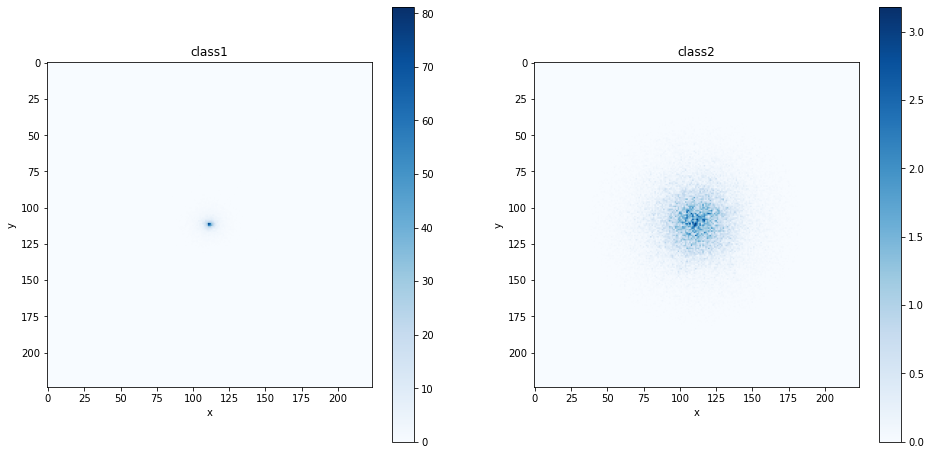

In [7]:
##############################################################################
#Code for X.1
file = np.load('/kaggle/input/phys591000-week02/train.npz', allow_pickle = True)

labels = np.unique(file['label'], axis = 0)

label = file['label']
img_pt = file['img_pt']

img0 = np.zeros(img_pt[0].shape)
img1 = np.zeros(img_pt[0].shape)

for i,elem in enumerate(label):
    if np.array_equal(elem,labels[0]):
        img0 += img_pt[i]
    elif np.array_equal(elem,labels[1]):
        img1 += img_pt[i]
    else:
        print('!')


plt.figure(figsize = (16,8))
plt.subplot(1,2,1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('class1')
plt.imshow(img0,cmap = 'Blues')
plt.colorbar()
plt.subplot(1,2,2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('class2')
plt.imshow(img1,cmap = 'Blues')
plt.colorbar()

##############################################################################


##############################################################################  
X.2 Describe your finding

兩個class 的 transverse momentum 中心很相像，都坐落在 x= (100,125) and y = (100,125) 間，但 class2 momentum 在 空間上的分佈比 class1 要廣，class1 在空間中的分佈相當集中，每個momentum 的值約是 10^(-1)，而class1 在全部event 加起來後 中心位置可達 10^2，可說明其集中性，而class2 則是 10^1。由於未知這個dataset 的其他條件，但如果這是散射，空間的分佈、偏轉往往說明被碰撞物體的物理特性（就如 alpha 粒子的實驗一樣），在上述的圖中，我猜 class1 的粒子更電荷分佈或是體積更集中，而class2 則相反。


##############################################################################
